# N$_2$ prototype - energy & rdm1

In [24]:
import pyscf
from pyscf import gto, scf, dft, ao2mo, fci
import numpy as np
import scipy.linalg as lin
import matplotlib.pyplot as plt

In [25]:
HARTREE_TO_eV = 27.311285

In [26]:
1.0/(0.3166808991e-5*27.311285)

11562.0807045062

In [27]:
npoints = 20
R_begin=1.0
R_end=3.5
R = np.linspace(start=R_begin,stop=R_end,num=npoints)

In [28]:
def get_entropy(mf,mo_occ=None):
    if mo_occ is None:
        f = mf.get_occ()/2
    else:
        f = mo_occ
    #print(f)
    f = f[(f>0) & (f<1)]
    return -2*(f*np.log(f) + (1-f)*np.log(1-f)).sum()

In [29]:
def run_rks(mol_str,smear=False,tau=500,basis='sto-3g'):
    mol = gto.M(atom=mol_str, basis=basis)
    mol.smearing = smear
    mol.tau = tau
    mf = scf.RKS(mol)
    mf.xc='PBE'
    mf.run()
    h1 = mf.mo_coeff.T.dot(mf.get_hcore()).dot(mf.mo_coeff)
    rdm1=mf.make_rdm1()
    T = mf.mol.intor_symmetric('int1e_kin')
    Ekin = np.einsum('pq,qp', T, rdm1)*HARTREE_TO_eV
    #print("Ts: ", Ekin)
    #d = np.zeros(h1.shape[0])
    s = mf.get_occ()
    #for i in np.arange(h1.shape[0]):
    #    d[i] = h1[i,i]
    return s, mf, Ekin, mf.energy_tot()*HARTREE_TO_eV

In [30]:
def run_fci(mol_str,basis='sto-3g'):
    mol = gto.M(atom=mol_str, basis=basis)
    mf = scf.RHF(mol)
    mf.run()
    norb=np.shape(mf.get_occ())[0]
    h1 = mf.mo_coeff.T.dot(mf.get_hcore()).dot(mf.mo_coeff)
    T = mf.mo_coeff.T.dot(mf.mol.intor_symmetric('int1e_kin')).dot(mf.mo_coeff)
    eri = ao2mo.kernel(mol, mf.mo_coeff)
    cisolver = fci.direct_spin1.FCI(mol)
    e, ci = cisolver.kernel(h1, eri, h1.shape[1], mol.nelec, ecore=mol.energy_nuc())
    rdm1=cisolver.make_rdm1(fcivec=ci,norb=norb,nelec=mol.nelec)
    Ekin = np.einsum('pq,qp', T, rdm1)*HARTREE_TO_eV
    #print("exact T: ", Ekin)
    #d = np.zeros(h1.shape[0])
    s = np.zeros(h1.shape[0])
    for i in np.arange(h1.shape[0]):
        #d[i] = h1[i,i]
        s[i] = rdm1[i,i]
    return s, mf, Ekin, e*HARTREE_TO_eV


In [31]:
smear = False
occupations_KS = []
energies_KS = []
calculations_KS = []
Ekin_KS = []
ener_KS = []
for i in np.arange(npoints):
    mol_str = "N 0 0 0; N 0 0 "+str(R[i])
    s, mf, Ekin, e = run_rks(mol_str=mol_str, smear=smear)
    occupations_KS.append(s)
    calculations_KS.append(mf)
    Ekin_KS.append(Ekin)
    ener_KS.append(e)

converged SCF energy = -107.821869933871
converged SCF energy = -107.942401287257
converged SCF energy = -107.943995558421
converged SCF energy = -107.896716495994
converged SCF energy = -107.832224251543
converged SCF energy = -107.764250372838
converged SCF energy = -107.699042542775
converged SCF energy = -107.63977812746
converged SCF energy = -107.587962023914
converged SCF energy = -107.543885672815
converged SCF energy = -107.507034558049
converged SCF energy = -107.476525236268
converged SCF energy = -107.451447183883
converged SCF energy = -107.431025092488
converged SCF energy = -107.414617857425
converged SCF energy = -107.401650671677
converged SCF energy = -107.391577486776
converged SCF energy = -107.383885426322
converged SCF energy = -107.37810625786
converged SCF energy = -107.373133326231


In [32]:
tau = 11562.0807045062 #KT=1eV
smear = True
occupations_KS_tau = []
energies_KS_tau = []
calculations_KS_tau = []
Ekin_KS_tau = []
ener_KS_tau = []

for i in np.arange(npoints):
    mol_str = "N 0 0 0; N 0 0 "+str(R[i])
    s, mf, Ekin, e = run_rks(mol_str=mol_str,tau=tau,smear=smear)
    occupations_KS_tau.append(s)
    calculations_KS_tau.append(mf)
    if smear:
        mTS=-0.3166808991e-5*tau*get_entropy(mf)*HARTREE_TO_eV
    else:
        mTS = 0.0
    print(mTS)
    Ekin_KS_tau.append(Ekin)
    ener_KS_tau.append(e+mTS)

converged SCF energy = -107.812353393329
-0.31469459962738056
converged SCF energy = -107.923138137958
-0.6586414942344416
converged SCF energy = -107.908428430596
-1.26084976861114
converged SCF energy = -107.839051462586
-2.1630656087293634
converged SCF energy = -107.753470825933
-3.2180402651709596
converged SCF energy = -107.672155432324
-4.2160800087591515
converged SCF energy = -107.602553807999
-5.055149365432389
converged SCF energy = -107.544589263695
-5.758035597349006
converged SCF energy = -107.496605624342
-6.371895453717016
converged SCF energy = -107.457977810395
-6.902154933713992
converged SCF energy = -107.428290184852
-7.333582619451963
converged SCF energy = -107.406488158254
-7.662085879431891
converged SCF energy = -107.391096274252
-7.898220986524283
converged SCF energy = -107.380633522511
-8.059542022485651
converged SCF energy = -107.373799019453
-8.164630967070943
converged SCF energy = -107.369510443631
-8.230076601707946
converged SCF energy = -107.3669172

In [33]:
occupations_FCI = []
energies_FCI = []
calculations_FCI = []
Ekin_FCI = []
ener_FCI = []
for i in np.arange(npoints):
    mol_str = "N 0 0 0; N 0 0 "+str(R[i])
    s, mf, Ekin, e = run_fci(mol_str=mol_str)
    occupations_FCI.append(s)
    calculations_FCI.append(mf)
    Ekin_FCI.append(Ekin)
    ener_FCI.append(e)

converged SCF energy = -107.419532451682
converged SCF energy = -107.500636768427
converged SCF energy = -107.457252921991
converged SCF energy = -107.362132203022
converged SCF energy = -107.24940947754
converged SCF energy = -107.134758296324
converged SCF energy = -107.025681096773
converged SCF energy = -106.92600639124
converged SCF energy = -106.837470759969
converged SCF energy = -106.760345124188
converged SCF energy = -106.69395956508
converged SCF energy = -106.637217661578
converged SCF energy = -106.588961464897
converged SCF energy = -106.548129533341
converged SCF energy = -106.513769284173
converged SCF energy = -106.484999795986
converged SCF energy = -106.460987163835
converged SCF energy = -106.440947481562
converged SCF energy = -106.424165767208
converged SCF energy = -106.410014865762


In [34]:
occupations_FCI = np.array(occupations_FCI,dtype=np.float)
occupations_KS = np.array(occupations_KS,dtype=np.float)
occupations_KS_tau = np.array(occupations_KS_tau,dtype=np.float)

In [37]:
occupations_FCI

array([[1.9999879 , 1.9999921 , 1.99328126, 1.98699361, 1.95127521,
        1.95127521, 1.98954873, 0.05698166, 0.05698166, 0.01368265],
       [1.99998977, 1.99999299, 1.99084543, 1.98622503, 1.92378002,
        1.92378002, 1.98381747, 0.08480737, 0.08480737, 0.02195452],
       [1.99999181, 1.99999394, 1.9885428 , 1.98598889, 1.97442466,
        1.88263397, 1.88263397, 0.12577478, 0.12577478, 0.03424041],
       [1.99999487, 1.99999359, 1.98668364, 1.9865436 , 1.95954827,
        1.81987651, 1.81987651, 0.18768492, 0.18768492, 0.05211317],
       [1.99999582, 1.99999506, 1.98543027, 1.98803426, 1.93505727,
        1.72288164, 1.72288164, 0.28313468, 0.28313468, 0.07945469],
       [1.99999683, 1.99999629, 1.98503612, 1.99020328, 1.88982744,
        1.58213006, 1.58213006, 0.421903  , 0.421903  , 0.12687392],
       [1.9999978 , 1.99999734, 1.98609722, 1.99221762, 1.80667535,
        1.41626115, 1.41626115, 0.58596227, 0.58596227, 0.21056784],
       [1.99999858, 1.99999815, 1.9887084

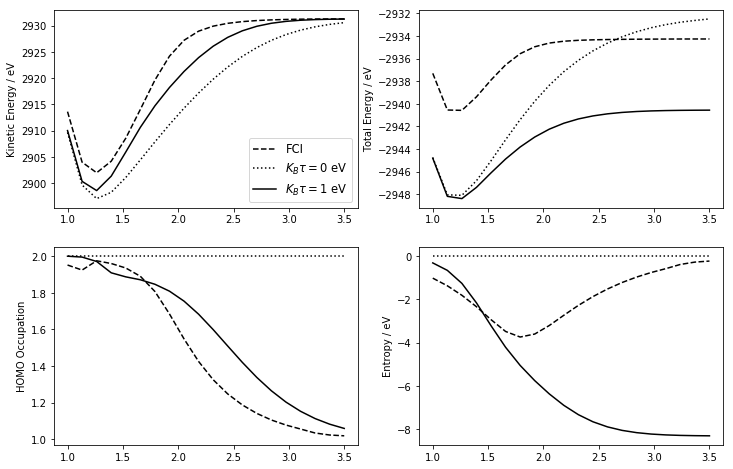

In [40]:
font=11.5
fig, ax = plt.subplots(2,2,figsize=(12,8))
#
ax[0,0].set_ylabel("Kinetic Energy / eV")
ax[0,0].plot(R,Ekin_FCI,label=r'FCI',color='black',linestyle='--')
ax[0,0].plot(R,Ekin_KS,label=r'$K_B\tau = 0$ eV',color='black',linestyle=':')
ax[0,0].plot(R,Ekin_KS_tau,label=r'$K_B\tau = 1$ eV',color='black',linestyle='-')
#
ax[0,1].set_ylabel("Total Energy / eV")
ax[0,1].plot(R,ener_FCI,label=r'FCI',color='black',linestyle='--')
ax[0,1].plot(R,ener_KS,label=r'$K_B\tau = 0$ eV',color='black',linestyle=':')
ax[0,1].plot(R,ener_KS_tau,label=r'$K_B\tau = 1$ eV',color='black',linestyle='-')
#
ax[1,0].set_ylabel("HOMO Occupation")
ax[1,0].plot(R,occupations_FCI[:,4],label=r'FCI',color='black',linestyle='--')
ax[1,0].plot(R,occupations_KS[:,4],label=r'$K_B\tau = 0$ eV',color='black',linestyle=':')
ax[1,0].plot(R,occupations_KS_tau[:,4],label=r'$K_B\tau = 1$ eV',color='black',linestyle='-')
#ax[1,0].set_ylim([0,2])
#
ax[1,1].set_ylabel("Entropy / eV")
entropy_KS = np.zeros(npoints)
entropy_KS_tau = np.zeros(npoints)
entropy_FCI = np.zeros(npoints)
for i in range(npoints):
    #entropy_KS[i]=-0.3166808991e-5*tau*get_entropy(calculations_KS_tau[i])
    entropy_KS_tau[i]=-0.3166808991e-5*tau*get_entropy(calculations_KS_tau[i])*HARTREE_TO_eV
    entropy_FCI[i]=-0.3166808991e-5*tau*get_entropy(calculations_FCI[i],occupations_FCI[i,:])*HARTREE_TO_eV

ax[1,1].plot(R,entropy_FCI,label=r'FCI',color='black',linestyle='--')
ax[1,1].plot(R,entropy_KS,label=r'$K_B\tau = 0$ eV',color='black',linestyle=':')
ax[1,1].plot(R,entropy_KS_tau,label=r'$K_B\tau = 1$ eV',color='black',linestyle='-')

ax[0,0].legend(fontsize=font)
#for i in 0, 1:
#    for j in 0, 1:
#        ax[i,j].legend(fontsize=font)
plt.savefig("N2.pdf")
plt.show()

# prototyping natural orbitals

In [ ]:
SVD = lin.svd

In [ ]:
U, s, Vh = SVD(a=rdm1)

In [ ]:
h1_natural = np.dot(Vh.T, np.dot(h1, U.T))

In [ ]:
d = np.zeros(h1_natural.shape[0])
s = np.zeros(h1_natural.shape[0])
for i in np.arange(h1_natural.shape[0]):
    d[i] = h1_natural[i,i]
    s[i] = rdm1[i,i]

In [ ]:
plt.scatter(x=d,y=s)
plt.show()